# p13: Solve linear BVP $u_{xx} = \exp(4x)$, $u(-1)=u(1)=0$

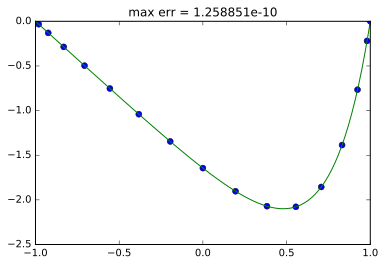

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from chebPy import *
from numpy import dot,exp,zeros,sinh,cosh,max,linspace,polyval,polyfit,inf
from numpy.linalg import norm
from scipy.linalg import solve
from matplotlib.pyplot import title,plot

N = 16
D,x = cheb(N)
D2 = dot(D,D)
D2 = D2[1:N,1:N]
f = exp(4.0*x[1:N])
u = solve(D2,f)
s = zeros(N+1)
s[1:N] = u

xx = linspace(-1.0,1.0,200)
uu = polyval(polyfit(x,s,N),xx)    # interpolate grid data
exact = (exp(4.0*xx) - sinh(4.0)*xx - cosh(4.0))/16.0
maxerr = norm(uu-exact,inf)

title('max err = %e' % maxerr)
plot(x,s,'o',xx,exact);